### Question 2

_First read in data_

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv("fatal-police-shootings-data.csv")

Then we first look at the data and treat them year by year

In [3]:
# extract the year from date
df['year'] = df['date'].str[0:4]

# add a column to count, just a column, the content does not matter
df['year_count'] = df['id']

year_counts = df.groupby('year')[['year_count']].agg(lambda x: len(x))

year_counts

,year_count
year,
2015,994
2016,958
2017,981
2018,985
2019,999
2020,1020
2021,1054
2022,255


<AxesSubplot:xlabel='year', ylabel='Count'>

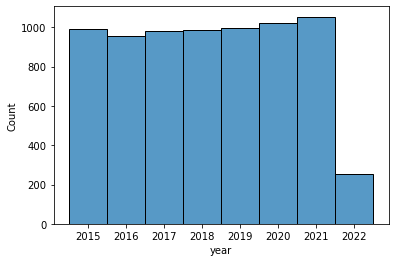

In [4]:
# Then we may have a histogram for each year
sns.histplot(data = df, x = 'year')

In [5]:
df['dt_time'] = pd.to_datetime(df['date'])
d = df['dt_time']
# We can generate a date range using Pandas
time_index = pd.date_range(start = '2015-01-01', end = '2022-04-05')

# create a dict to contain the information
dict_t = {}
for element in time_index:
    dict_t[element] = 0

for element in d:
    dict_t[element] += 1

dict_t

{Timestamp('2015-01-01 00:00:00', freq='D'): 0,
 Timestamp('2015-01-02 00:00:00', freq='D'): 2,
 Timestamp('2015-01-03 00:00:00', freq='D'): 1,
 Timestamp('2015-01-04 00:00:00', freq='D'): 3,
 Timestamp('2015-01-05 00:00:00', freq='D'): 1,
 Timestamp('2015-01-06 00:00:00', freq='D'): 4,
 Timestamp('2015-01-07 00:00:00', freq='D'): 4,
 Timestamp('2015-01-08 00:00:00', freq='D'): 4,
 Timestamp('2015-01-09 00:00:00', freq='D'): 2,
 Timestamp('2015-01-10 00:00:00', freq='D'): 0,
 Timestamp('2015-01-11 00:00:00', freq='D'): 3,
 Timestamp('2015-01-12 00:00:00', freq='D'): 0,
 Timestamp('2015-01-13 00:00:00', freq='D'): 2,
 Timestamp('2015-01-14 00:00:00', freq='D'): 6,
 Timestamp('2015-01-15 00:00:00', freq='D'): 5,
 Timestamp('2015-01-16 00:00:00', freq='D'): 2,
 Timestamp('2015-01-17 00:00:00', freq='D'): 3,
 Timestamp('2015-01-18 00:00:00', freq='D'): 2,
 Timestamp('2015-01-19 00:00:00', freq='D'): 1,
 Timestamp('2015-01-20 00:00:00', freq='D'): 1,
 Timestamp('2015-01-21 00:00:00', freq='

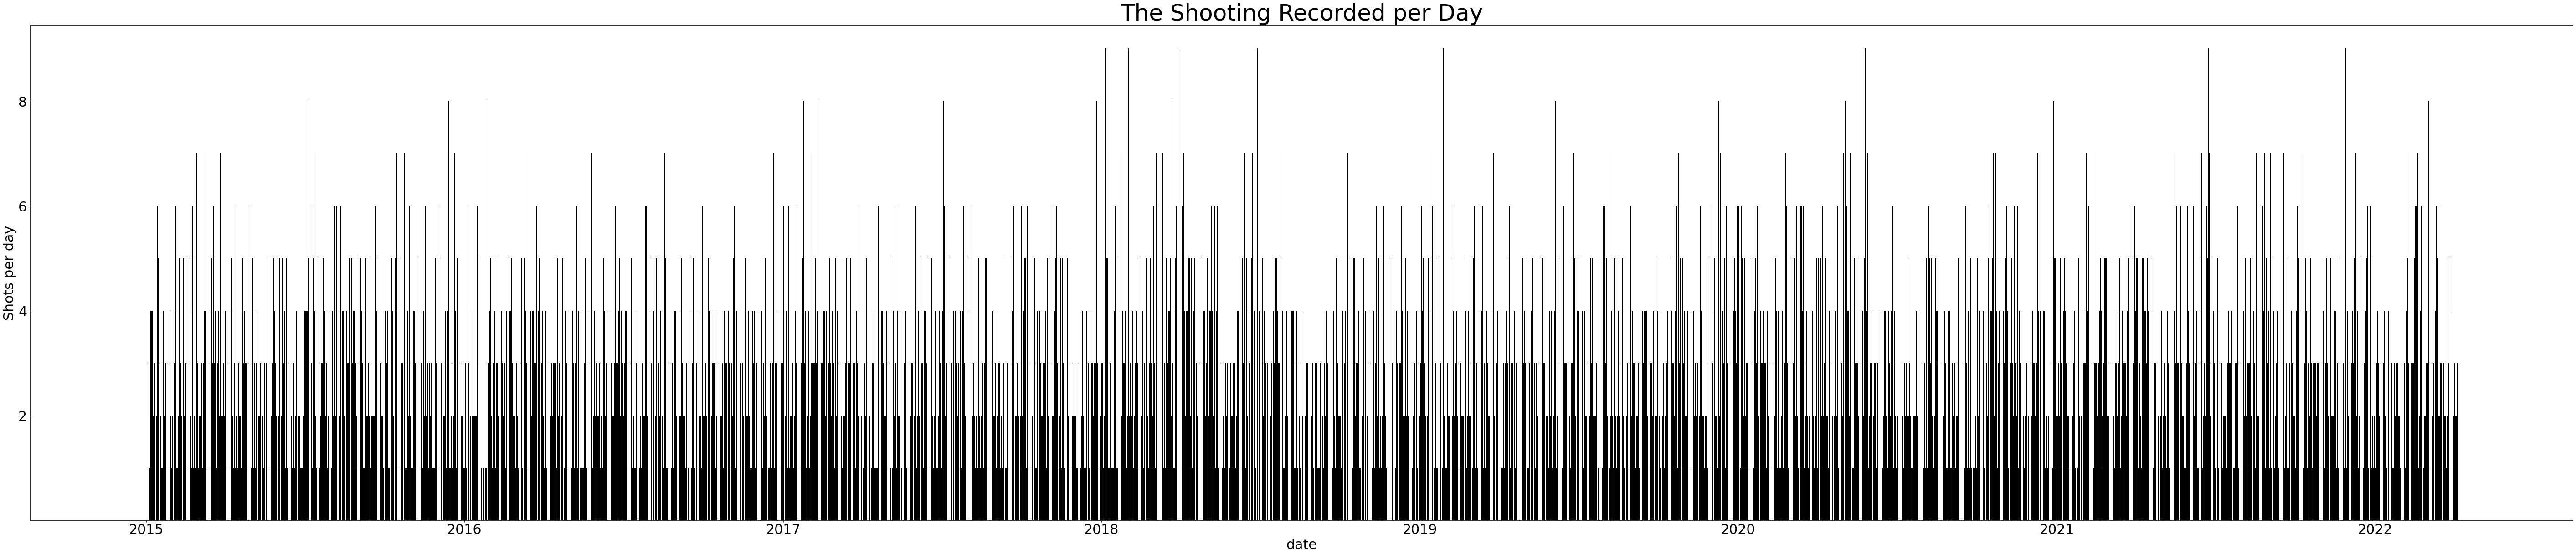

In [6]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((100,20))
plt.bar(x = dict_t.keys(), height = dict_t.values(), color = 'black')
# plt.xticks([2015, 2016, 2017, 2018, 2019, 2020])
# ax.xaxis.set_major_locator(ticker.MultipleLocator(360))
# plt.xlim(pd.to_datetime('20'))
plt.xticks(size = 30)
plt.yticks([2,4,6,8],size = 30)
plt.xlabel('date',size = 30)
plt.ylabel('Shots per day', size = 30)
plt.title("The Shooting Recorded per Day", size = 50)
plt.show()

In [7]:
# Instead, we may plot the data year by year
df_2015 = df[df['year'] == '2015']
dt = pd.to_datetime(df_2015['date'],errors='ignore')
df_2015.loc['dt'] = dt

C:\anaconda\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


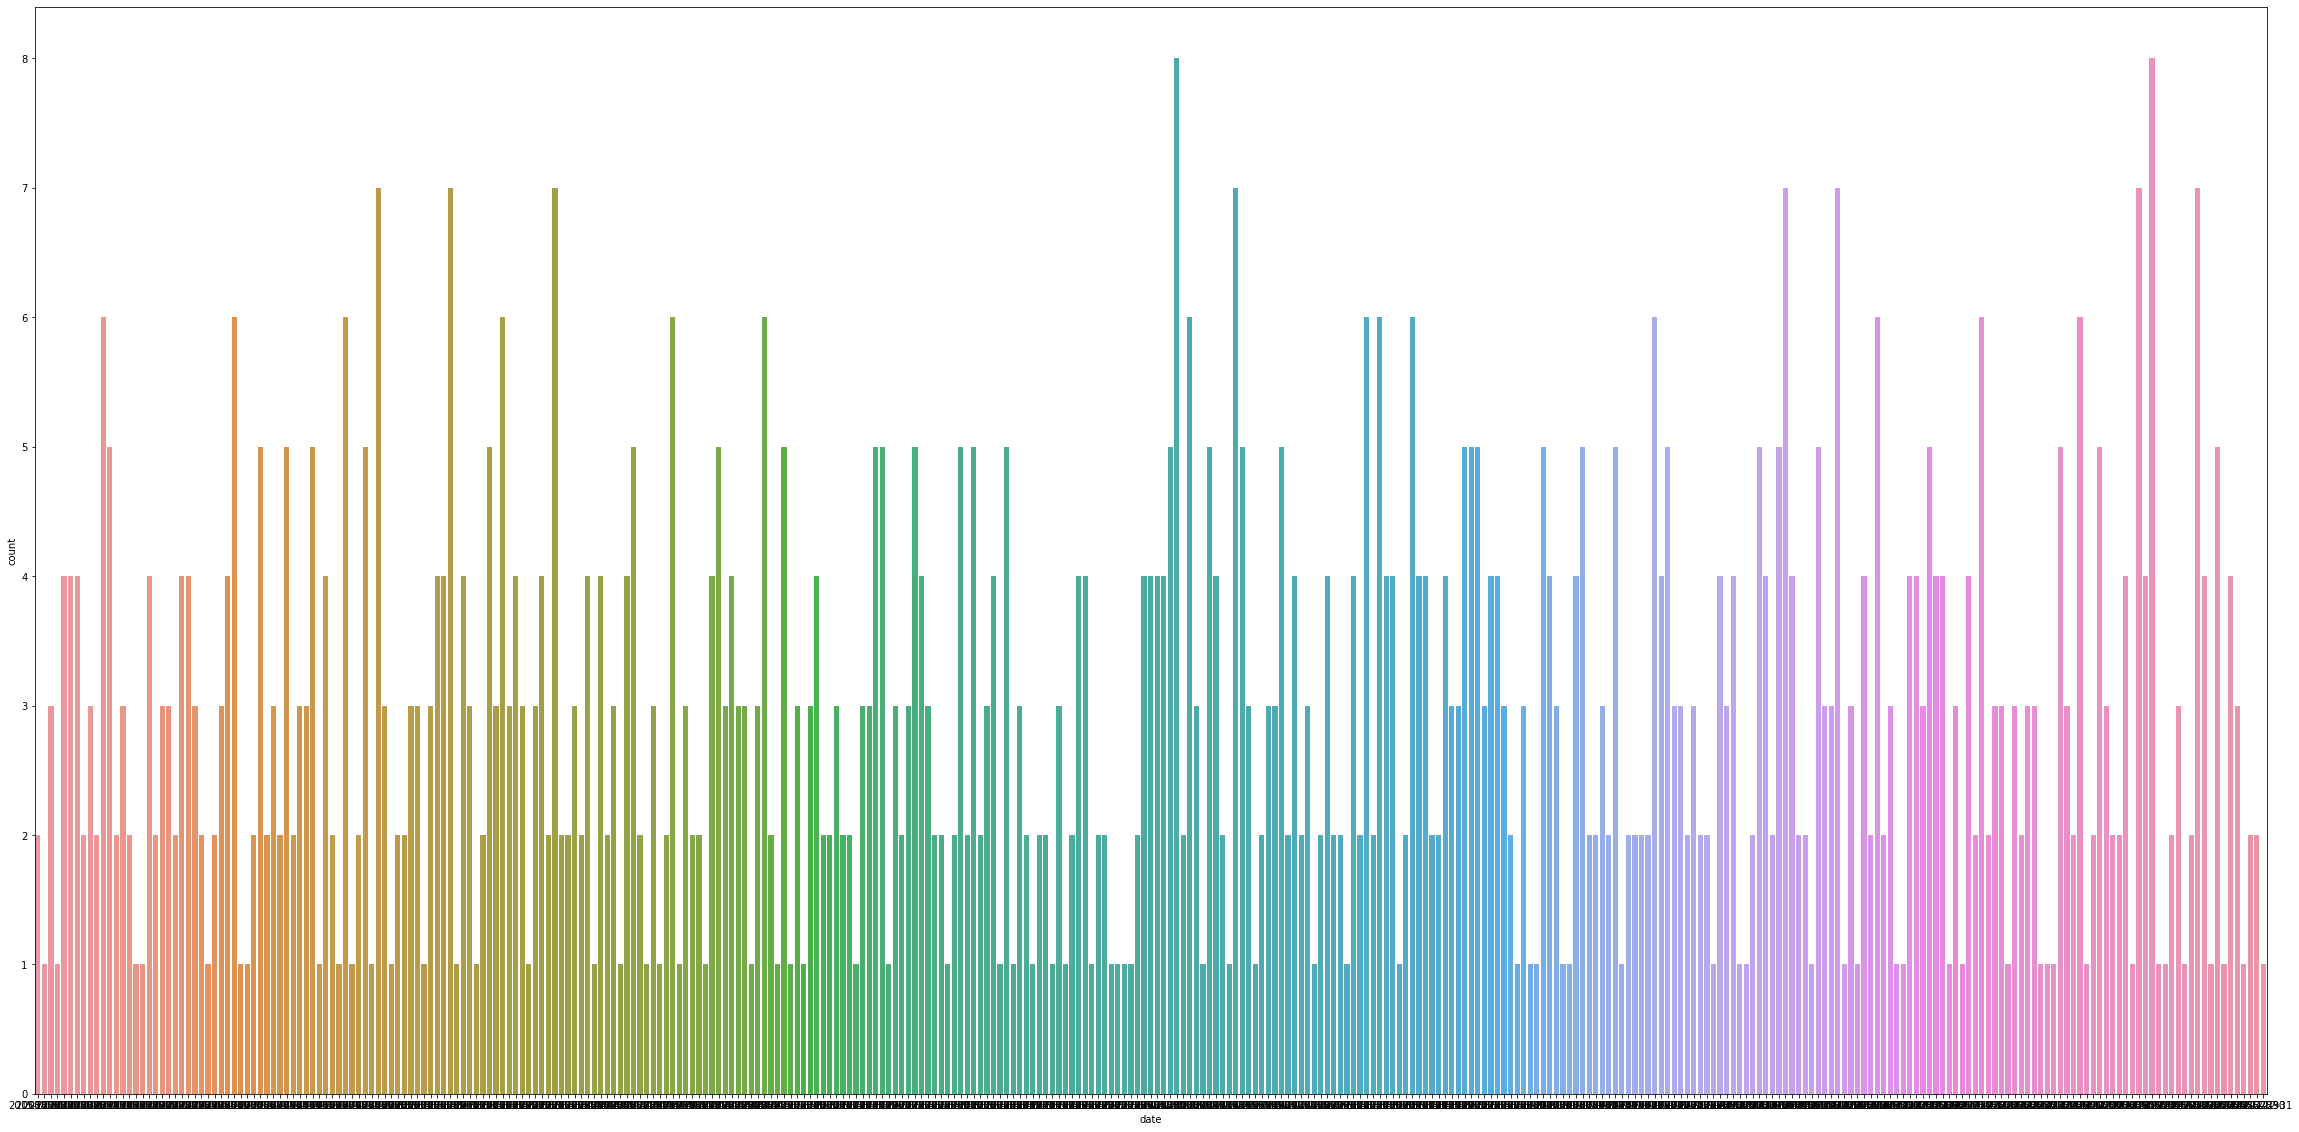

([<matplotlib.axis.XTick at 0x24340afabe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

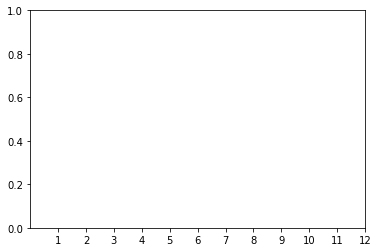

In [8]:
plt.figure(figsize = (40,20))
sns.countplot(data = df_2015, x = 'date')
plt.show()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

### Question 3

shot days =  2471
No shot days =  183
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10 or more']


[183, 503, 615, 568, 390, 221, 103, 50, 13, 8, 0]

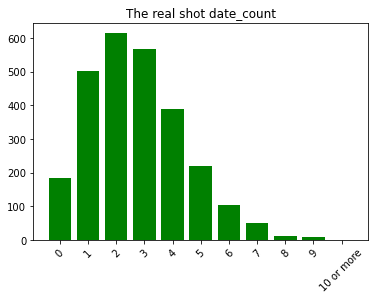

In [9]:
# add another column about date count
df['date_count'] = df['id']
date_counts = df.groupby('date')['date_count'].agg(lambda x: len(x)).value_counts().sort_index()

# determine the number of dates when there is no shot, assume that the data is updated to 2022.4.7
shot_days = sum(date_counts)
no_shot_days = 365*5 + 366 *2 + 31 + 28 + 31 + 7 - shot_days

print("shot days = ", shot_days)
print("No shot days = ", no_shot_days)

x_index = ['0']
for element in date_counts.index:
    x_index.append(str(element))

x_index.append('10 or more')

y_index = [no_shot_days]
for element in date_counts:
    y_index.append(int(element))
y_index.append(0)

print(x_index)

plt.bar(x_index, height = y_index, color = 'green')
plt.title("The real shot date_count")
plt.xticks(rotation = 45)

y_index


In [10]:
df.groupby('date')['date_count'].agg(lambda x: len(x)).value_counts().sort_index()

1    503
2    615
3    568
4    390
5    221
6    103
7     50
8     13
9      8
Name: date_count, dtype: int64

Since the total number of dates are
$$
    Total\_dates = 365*5 + 366 *2 + 31 + 28 + 31 + 7 = 2654
$$
and the total number of shots are
$$
    Shots = 7246
$$
we can calculate that if the data follows a Poisson Distribution, it will have
$$
    k = \frac{7246}{2654} = 2.73
$$
And thus the density function should be
$$
    f_{X}(x) = \frac{2.73^{x}e^{-2.73}}{x!}
$$

We may calculate the expected day shot distribution as

[173.09199477921044,
 472.54114574724457,
 645.0186639449887,
 586.9669841899398,
 400.6049667096339,
 218.7303118234601,
 99.52229187967436,
 38.813693833072996,
 13.24517302053616,
 4.017702482895968,
 1.4470715893425465]

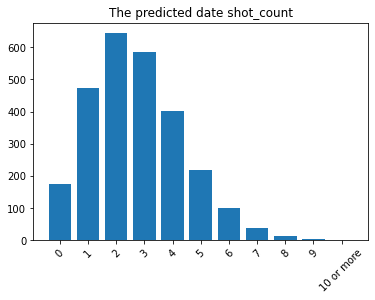

In [11]:
import math

def density_function(x):
    return (2.73**x)* math.exp(-2.73) / math.factorial(x)

predicted_value = []

CDF = 0
for i in range(0,10):
    CDF += density_function(i)
    predicted_value.append(density_function(i) * 2654)

predicted_value.append((1-CDF)*2654)

plt.bar(x = ['0','1','2','3','4','5','6','7','8','9', '10 or more'], height = predicted_value)
plt.title("The predicted date shot_count")
plt.xticks(rotation = 45)

predicted_value

Text(0.5, 1.0, 'Predicted Values')

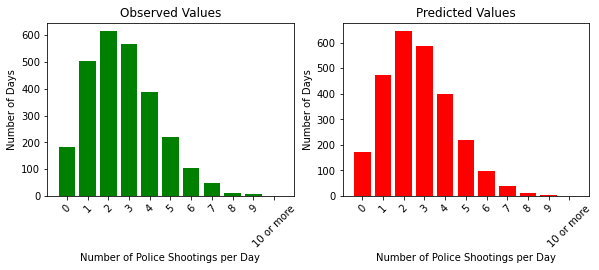

In [12]:
fig = plt.figure(figsize=(15,7))
 
fig1 = plt.subplot(231)
plt.bar(x_index, height = y_index, color = 'green')
plt.xticks(rotation = 45)
plt.xlabel('Number of Police Shootings per Day') 
plt.ylabel('Number of Days')
plt.title('Observed Values')
 
fig2 = plt.subplot(232)
plt.bar(x = ['0','1','2','3','4','5','6','7','8','9', '10 or more'], height = predicted_value, color = 'red')
plt.xticks(rotation = 45)
plt.xlabel('Number of Police Shootings per Day') 
plt.ylabel('Number of Days')
plt.title('Predicted Values')

#### We then do hypothesis test
This test is according to Example 25.11 in Slides 570

Whether we should **devide the data into training set and test set** is to be discussed

We fisrt find maximum-likelihood estimator for $k$ is the sample mean
$$
    \hat{k} = \bar{X} = 2.73
$$

The density function for each possible value $X$ is

In [13]:
np.array(predicted_value)/2654

array([0.06521929, 0.17804866, 0.24303642, 0.22116314, 0.15094385,
       0.08241534, 0.03749898, 0.0146246 , 0.00499065, 0.00151383,
       0.00054524])

We can also find the expection for each $X$ is

In [14]:
np.array(predicted_value)

array([173.09199478, 472.54114575, 645.01866394, 586.96698419,
       400.60496671, 218.73031182,  99.52229188,  38.81369383,
        13.24517302,   4.01770248,   1.44707159])

In [15]:
np.array(y_index)

array([183, 503, 615, 568, 390, 221, 103,  50,  13,   8,   0])

We need also combine the observed values

In [16]:
# list1 is observed value, list2 is predicted value
def calculate_chi_square(list_1, list_2):
    sum = 0
    for i in range(0, len(list_1)):
        sum += (list_1[i] - list_2[i])*(list_1[i] - list_2[i])/list_2[i]
    return sum

calculate_chi_square(y_index,predicted_value)

13.588967045548475

If we combine `>10` and `9` to form `>9`, the statistic becomes

In [17]:
a = [183, 503, 615, 568, 390, 221, 103,  50,  13,   8]
b = [173.09199478, 472.54114575, 645.01866394, 586.96698419,400.60496671, 218.73031182,  99.52229188,  38.81369383, 13.24517302, 4.01770248 + 1.44707159]

calculate_chi_square(a, b)

9.370836607520188

Use `Mathematica`, we find that
$$
    \chi_{0.05,8}^{2} = 15.51 > 13.59
$$
Thus we are unable to reject $H_{0}$ at the 5% level of significance

Then we consider whether there is a difference if we only consider data collected later than 2020. And again test whether it follows a $\chi^{2}$ distribution

In [18]:
# we first filter out entries with year earlier than 2019
df['year'] = df['year'].map(lambda x: int(x))
filtered_df = df[df['year'] >= 2020]
filtered_df

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,year_count,dt_time,date_count
4917,5344,Derrick A. Elseth,2020-01-01,shot,gun,24.0,M,W,Richmond County,VA,...,other,Not fleeing,False,-76.875,38.100,True,2020,5344,2020-01-01,5344
4918,5347,Teddy James Maverick Varner,2020-01-01,shot,gun,29.0,M,W,Central Point,OR,...,attack,Not fleeing,True,-122.993,42.418,True,2020,5347,2020-01-01,5347
4919,5403,Gerardo Antonio Conchas-Bustas,2020-01-01,shot,knife,20.0,M,O,Denver,CO,...,attack,Not fleeing,True,-105.030,39.700,True,2020,5403,2020-01-01,5403
4920,5342,Gabriel Strickland,2020-01-01,shot and Tasered,toy weapon,25.0,M,W,Grass Valley,CA,...,attack,Not fleeing,False,-121.061,39.219,True,2020,5342,2020-01-01,5342
4921,5339,Jeffery Dale Millsap,2020-01-02,shot,gun,26.0,M,W,Holt,MO,...,attack,Car,False,-94.345,39.404,True,2020,5339,2020-01-02,5339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7241,7890,Patrick Lyoya,2022-04-04,shot,unarmed,26.0,M,NaN,Grand Rapids,MI,...,attack,Other,False,-85.638,42.927,True,2022,7890,2022-04-04,7890
7242,7894,NaN,2022-04-04,shot,vehicle,NaN,M,NaN,Jurupa Valley,CA,...,attack,Car,False,-117.506,33.975,True,2022,7894,2022-04-04,7894
7243,7891,Joseph Miller,2022-04-05,shot,gun,37.0,M,NaN,Laketon Township,MI,...,attack,Not fleeing,False,-86.373,43.297,True,2022,7891,2022-04-05,7891
7244,7900,Rance Tillman,2022-04-05,shot,gun,31.0,M,NaN,Cheyenne,WY,...,attack,Car,False,-104.767,41.163,True,2022,7900,2022-04-05,7900


In [19]:
# Then we do the aggregation
filtered_date_count = filtered_df.groupby('date')['date_count'].agg(lambda x: len(x)).value_counts().sort_index()
filtered_date_count

1    155
2    198
3    185
4    112
5     71
6     37
7     21
8      3
9      3
Name: date_count, dtype: int64

In [20]:
# Add 0 days
filtered_no_shot_date = 828 - sum(filtered_date_count)

filtered_observed = [filtered_no_shot_date]
for element in filtered_date_count:
    filtered_observed.append(int(element))
filtered_observed.append(0)

filtered_observed[9] = filtered_observed[9] + filtered_observed[10]
filtered_observed.pop(10)
filtered_observed

[43, 155, 198, 185, 112, 71, 37, 21, 3, 3]

#### We now do hypothesis test
Assume the $k$ is different
$$
    k^{'} = \frac{2329}{828} = 2.81
$$
And thus the density function should be
$$
    f_{X}(x) = \frac{2.81^{x}e^{-2.81}}{x!}
$$

0.5613934622423895

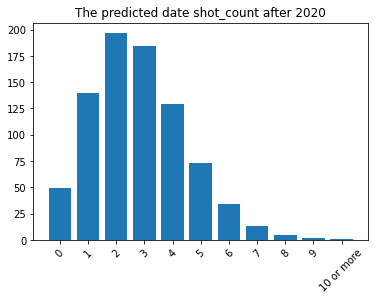

In [21]:
import math

def filtered_density_function(x):
    return (2.81**x)* math.exp(-2.81) / math.factorial(x)

filtered_predicted_value = []

filtered_CDF = 0
for i in range(0,10):
    filtered_CDF += filtered_density_function(i)
    filtered_predicted_value.append(filtered_density_function(i) * 828)

filtered_predicted_value.append((1-filtered_CDF) *828)

plt.bar(x = ['0','1','2','3','4','5','6','7','8','9','10 or more'], height = filtered_predicted_value)
plt.title("The predicted date shot_count after 2020")
plt.xticks(rotation = 45)

filtered_predicted_value[9] = filtered_predicted_value[9] + filtered_predicted_value[10]
filtered_predicted_value.pop(10)

In [22]:
calculate_chi_square(filtered_observed, filtered_predicted_value)

10.21698287507813

Use `Mathematica`, we find that
$$
    \chi_{0.05,8}^{2} = 15.51 > 10.21
$$
Thus we are unable to reject $H_{0}$ at the 5% level of significance.
So we may conclude that the data after 2020 still follows a Poisson Distribution, but with different $k$.

Also, we can use the previous model to predict

In [23]:
len(df[df['year']<2020])/(365*4 + 366)
df_15_19 = df[df['year']<2020]
df_15_19

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,year_count,dt_time,date_count
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,attack,Not fleeing,False,-123.122,47.247,True,2015,3,2015-01-02,3
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,attack,Not fleeing,False,-122.892,45.487,True,2015,4,2015-01-02,4
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,other,Not fleeing,False,-97.281,37.695,True,2015,5,2015-01-03,5
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,attack,Not fleeing,False,-122.422,37.763,True,2015,8,2015-01-04,8
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,attack,Not fleeing,False,-104.692,40.384,True,2015,9,2015-01-04,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,5333,Frederick Perkins,2019-12-31,shot,vehicle,37.0,M,B,Chesterfield,MO,...,attack,Car,False,-90.661,38.677,True,2019,5333,2019-12-31,5333
4913,5345,Dedrick Thomas,2019-12-31,shot,gun,NaN,M,B,Forrest City,AR,...,attack,NaN,False,-90.790,35.033,True,2019,5345,2019-12-31,5345
4914,5358,Malik Williams,2019-12-31,shot,gun,23.0,M,B,Federal Way,WA,...,attack,Not fleeing,False,-122.316,47.322,True,2019,5358,2019-12-31,5358
4915,5359,Terry Hudson,2019-12-31,shot,gun,57.0,M,B,Omaha,NE,...,attack,Not fleeing,True,-95.947,41.292,True,2019,5359,2019-12-31,5359


In [24]:
365*4 + 366

1826

[123.9505952928364,
 333.4271013377299,
 448.4594512992467,
 402.11864133165784,
 270.4247862955399,
 145.48853502700047,
 65.22735987043853,
 25.065942578782813,
 8.42842319211572,
 3.4091637746517813]

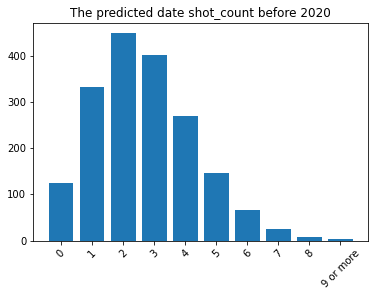

In [25]:
import math

def filtered_density_function(x):
    return (2.69**x)* math.exp(-2.69) / math.factorial(x)

filtered_predicted_value = []

filtered_CDF = 0
for i in range(0,10):
    filtered_CDF += filtered_density_function(i)
    filtered_predicted_value.append(filtered_density_function(i) * 1826)

filtered_predicted_value.append((1-filtered_CDF) *1826)

filtered_predicted_value[9] = filtered_predicted_value[9] + filtered_predicted_value[10]
filtered_predicted_value.pop(10)

plt.bar(x = ['0','1','2','3','4','5','6','7','8','9 or more'], height = filtered_predicted_value)
plt.title("The predicted date shot_count before 2020")
plt.xticks(rotation = 45)
filtered_predicted_value

In [26]:
date_counts = df_15_19.groupby('date')['date_count'].agg(lambda x: len(x)).value_counts().sort_index()
date_counts

observed_15_19 = [1826 - sum(date_counts)]
for element in date_counts:
    observed_15_19.append(element)

calculate_chi_square(observed_15_19, filtered_predicted_value)


7.844986063046646

In [27]:
another_predicted_value = []

another_CDF = 0
for i in range(0,10):
    another_CDF += filtered_density_function(i)
    another_predicted_value.append(filtered_density_function(i) * 828)

another_predicted_value.append((1-another_CDF) * 828)

another_predicted_value[9] = another_predicted_value[9] + another_predicted_value[10]
another_predicted_value.pop(10)

calculate_chi_square(filtered_observed, another_predicted_value)

16.254788916066087

In [28]:
another_predicted_value

[56.20541779981848,
 151.1925738815117,
 203.35401187063323,
 182.34076397733443,
 122.62416377475742,
 65.97180011081949,
 29.577357049684068,
 11.366155780521451,
 3.8218698812003375,
 1.5458858737194274]

Use `Mathematica`, we find that
$$
    \chi_{0.05,8}^{2} = 15.51 > 15.02
$$
Thus we are unable to reject $H_{0}$ at the 5% level of significance.
So we may also conclude that the data after 2020 still follows a Poisson Distribution with the same $k$.

[43, 155, 198, 185, 112, 71, 37, 21, 3, 3]
[123.9505952928364, 333.4271013377299, 448.4594512992467, 402.11864133165784, 270.4247862955399, 145.48853502700047, 65.22735987043853, 25.065942578782813, 8.42842319211572, 3.4091637746517813]


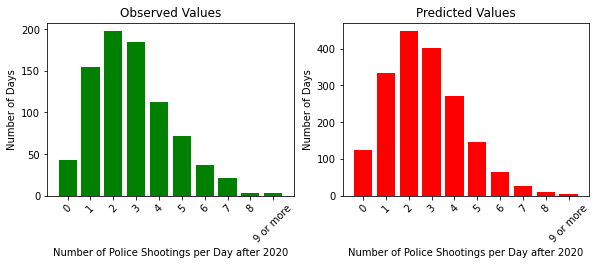

In [29]:
fig = plt.figure(figsize=(15,7))
 
fig1 = plt.subplot(231)
plt.bar(['0','1','2','3','4','5','6','7','8','9 or more'], height = filtered_observed, color = 'green')
plt.xticks(rotation = 45)
plt.xlabel('Number of Police Shootings per Day after 2020') 
plt.ylabel('Number of Days')
plt.title('Observed Values')
 
fig2 = plt.subplot(232)
plt.bar(x = ['0','1','2','3','4','5','6','7','8','9 or more'], height = filtered_predicted_value, color = 'red')
plt.xticks(rotation = 45)
plt.xlabel('Number of Police Shootings per Day after 2020') 
plt.ylabel('Number of Days')
plt.title('Predicted Values')

print(filtered_observed)
print(filtered_predicted_value)

### Question 4

We first extract two features, namely, the `weekday` and `month`

In [30]:
df['month'] = df['date'].str[5:7].map(lambda x: int(x))
df['weekday'] = pd.to_datetime(df['date']).dt.dayofweek + 1 # convert string to daytime type and map to the weekday
df_before_2022 = df[df['year'] <= 2021]
df_before_2022

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,year,year_count,dt_time,date_count,month,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,False,-123.122,47.247,True,2015,3,2015-01-02,3,1,5
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,False,-122.892,45.487,True,2015,4,2015-01-02,4,1,5
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,False,-97.281,37.695,True,2015,5,2015-01-03,5,1,6
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,False,-122.422,37.763,True,2015,8,2015-01-04,8,1,7
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,False,-104.692,40.384,True,2015,9,2015-01-04,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,7449,Osman Sesay,2021-12-29,shot,gun,27.0,M,B,Silver Spring,MD,...,False,NaN,NaN,True,2021,7449,2021-12-29,7449,12,3
6987,7457,Thelonious McKnight,2021-12-29,shot,undetermined,25.0,M,B,Paterson,NJ,...,False,NaN,NaN,True,2021,7457,2021-12-29,7457,12,3
6988,7460,Kadeem Errol Livingston Smith,2021-12-30,shot,gun,28.0,M,B,Pine Hills,FL,...,False,NaN,NaN,True,2021,7460,2021-12-30,7460,12,4
6989,7463,NaN,2021-12-31,shot,vehicle,NaN,M,NaN,Beaumont,CA,...,False,NaN,NaN,True,2021,7463,2021-12-31,7463,12,5


Let's first look at the `month`, note that we need to filter out the three months in 2022

In [31]:
month_values = df_before_2022['month'].value_counts().sort_index()
month_values

1     606
2     588
3     637
4     559
5     570
6     593
7     580
8     602
9     503
10    604
11    554
12    595
Name: month, dtype: int64

Text(0, 0.5, 'Shots per month')

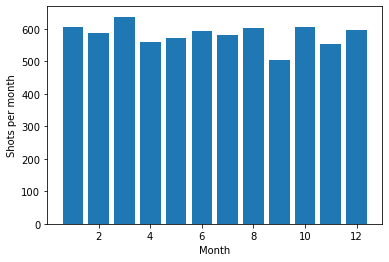

In [32]:
plt.bar(x = month_values.index, height = month_values)
plt.xlabel('Month')
plt.ylabel('Shots per month')

So the hypothesis to be
$$
    H_{0}: \text{The distribution is uniform with } \hat{k} = \bar{X} = 582.58
$$

In [33]:
month_predicted = []
for i in range(0,12):
    month_predicted.append(582.58)

calculate_chi_square(list(month_values), month_predicted)

21.47158639156854

From `mathematica` we obtain:
$$
    \chi^{2}_{0.05, 10} = 18.307 < 21.47
$$
Thus we reject $H_{0}$, which means that the shots are somehow depends on Month.

#### Another way to think is to find out each day's average shot and then aggregate by months. 
Which means we derive the month values by $k = 2.73$

In [56]:
new_predicted_month_value = 2.73*np.array([31*7, 28*5 + 29*2, 31*7, 30*7, 31*7, 30*7, 31*7, 31*7, 30*7, 31*7, 30*7, 31*7])
print(new_predicted_month_value)
calculate_chi_square(list(month_values), new_predicted_month_value)

[592.41 540.54 592.41 573.3  592.41 573.3  592.41 592.41 573.3  592.41
 573.3  592.41]


19.639840615094073

We find that
$$
    X^{2} = 19.63 > 18.307 = \chi^{2}_{0.05,10}
$$
So we reject $H_{0}$ as well.

##### Need to do correlation analysis 关联性分析
Consider the fact that different months have different length, we may consider `round to 30 days`.
$$
    H_{0}: \hat{k} =  2.734
$$

In [35]:
sum(month_values)/sum([31*7, 28*5 + 29*2, 31*7, 30*7, 31*7, 30*7, 31*7, 31*7, 30*7, 31*7, 30*7, 31*7])

2.7340633554947202

In [36]:
round_30_days = np.array(month_values)*np.array([30/31, 30*7/(28*5 + 29*2), 30/31, 1, 30/31, 1, 30/31, 30/31, 1, 30/31, 1, 30/31])
round_30_days

array([586.4516129 , 623.63636364, 616.4516129 , 559.        ,
       551.61290323, 593.        , 561.29032258, 582.58064516,
       503.        , 584.51612903, 554.        , 575.80645161])

In [37]:
predicted_shor_per_day = []
for i in range(0,12):
    predicted_shor_per_day.append(sum(round_30_days)/12)

calculate_chi_square(round_30_days, predicted_shor_per_day)

19.672003712256277

we find that
$$
    X^{2} = 19.67 > 19.67 = \chi^{2}_{0.05,11}
$$
On the one hand, we find that the month length difference indeed influences the hypothesis test. On the other hand, we find that we still reject $H_{0}$, if strictly follows the 5% line. Note that the P-value is
$$
    P = 0.0325
$$
Still somehow away from 5%

#### Then we have a look at the weekday

In [38]:
observed_weekday = df['weekday'].value_counts().sort_index()
observed_weekday

1     985
2    1103
3    1093
4    1075
5    1037
6     955
7     998
Name: weekday, dtype: int64

In [39]:
sum(observed_weekday)/7

1035.142857142857

Text(0, 0.5, 'Shot Count')

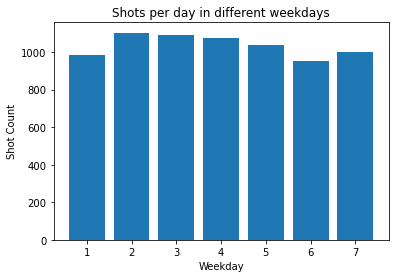

In [40]:
plt.bar(x = observed_weekday.index, height = observed_weekday)
plt.title("Shots per day in different weekdays")
plt.xlabel("Weekday")
plt.ylabel("Shot Count")

[43, 155, 198, 185, 112, 71, 37, 21, 3, 3]
[123.9505952928364, 333.4271013377299, 448.4594512992467, 402.11864133165784, 270.4247862955399, 145.48853502700047, 65.22735987043853, 25.065942578782813, 8.42842319211572, 3.4091637746517813]


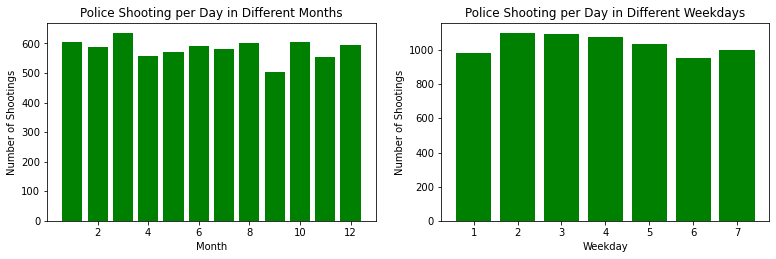

In [55]:
fig = plt.figure(figsize=(20,8))
 
fig1 = plt.subplot(231)
plt.bar(x = month_values.index, height = month_values, color = 'green')
plt.title('Police Shooting per Day in Different Months')
plt.xlabel('Month')
plt.ylabel('Number of Shootings')
 
fig2 = plt.subplot(232)
plt.bar(x = observed_weekday.index, height = observed_weekday, color = 'green')
plt.title("Police Shooting per Day in Different Weekdays")
plt.xlabel("Weekday")
plt.ylabel("Number of Shootings")

print(filtered_observed)
print(filtered_predicted_value)

If we set the hypothesis to be
$$
    H_{0} : \text{Follow a uniform distribution with } \hat{k} = \bar{X} = 1035.14
$$  

In [42]:
predicted_weekdays = []
for i in range(0,7):
    predicted_weekdays.append(1035.14)

calculate_chi_square(list(observed_weekday), predicted_weekdays)

19.18663871553606

Use `mathematica` we find that
$$
    \chi^{2}_{0.05, 5} = 11.07
$$

We find that
$$
    X^{2} = 19.17 > 11.07
$$
We will reject $H_{0}$ at 5% of significance level.
And indeed, we find that there are significantly more shots in Tuesday and Wednesday.

### Question 5

$$
    \bar{X} = \frac{1}{n}\sum_{i = 1}^{n}x_{i}
$$
Among which $x_{i}$ is the shots per day, $n$ is the number of days, and it follows a Poisson distribution with $E[X] = k, Var[X] = k$.
By the central limit theorem,
$$
    Z = \frac{\hat{k} - k}{\sqrt{k/n}} 
$$
follows a standard normal distribution.
And thus we plug in and find that the $(1-\alpha)100\%$ confidence interval is given by
$$
    \hat{k} \pm z_{\alpha/2}\sqrt{\hat{k}/n}
$$
Then we calculate such interval using data from 2015 to 2018.

In [43]:
df_15_19 = df[df['year']<2019]
df_15_19

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,year,year_count,dt_time,date_count,month,weekday
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,False,-123.122,47.247,True,2015,3,2015-01-02,3,1,5
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,False,-122.892,45.487,True,2015,4,2015-01-02,4,1,5
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,False,-97.281,37.695,True,2015,5,2015-01-03,5,1,6
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,False,-122.422,37.763,True,2015,8,2015-01-04,8,1,7
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,False,-104.692,40.384,True,2015,9,2015-01-04,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3913,4411,Paul Arbitelle,2018-12-30,shot and Tasered,knife,45.0,M,W,Danbury,CT,...,False,-73.444,41.386,True,2018,4411,2018-12-30,4411,12,7
3914,4332,Iosia Faletogo,2018-12-31,shot,gun,36.0,M,A,Seattle,WA,...,True,-122.345,47.699,True,2018,4332,2018-12-31,4332,12,1
3915,4335,Matthew Hurley,2018-12-31,shot,gun,45.0,M,W,Fort Dodge,IA,...,False,-94.168,42.497,True,2018,4335,2018-12-31,4335,12,1
3916,4337,Jesus Ramos,2018-12-31,shot,undetermined,34.0,M,H,Longmont,CO,...,False,-105.107,40.199,True,2018,4337,2018-12-31,4337,12,1


In [44]:
shot_values_15_19 = df_15_19.groupby('date')['id'].agg(lambda x: len(x)).value_counts().sort_index()

In [45]:
# The total number of days are
total_days_15_18 = 365 + 366 + 365 + 365

# Number of days that there are no shot are
zero_shot = total_days_15_18 - sum(shot_values_15_19)

# append this to the beginning
shot_values_fixed_15_19 = [zero_shot]

for element in shot_values_15_19:
    shot_values_fixed_15_19.append(element)

shot_values_fixed_15_19

[109, 287, 328, 312, 222, 118, 50, 23, 8, 4]

<BarContainer object of 10 artists>

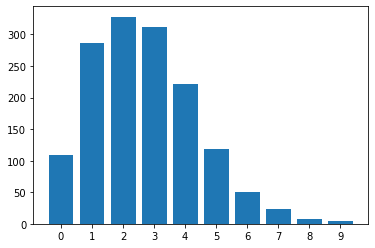

In [46]:
plt.bar(x = ['0','1','2','3','4','5','6','7','8','9'], height = shot_values_fixed_15_19)

In [47]:
hat_k = 3918/total_days_15_18
print(total_days_15_18)
hat_k

1461


2.6817248459958933

$$
    \hat{k} = 2.68
$$
If we assume $\alpha = 5\%$, we will have
$$
    \hat{k} \pm z_{\alpha/2}\sqrt{\hat{k}/n} = 2.68 \pm 1.64\sqrt{2.68/1461}
$$
This results in the confidence interval
$$
    [2.61, 2.75]
$$

### Question 6

[5, 17, 24, 23, 8, 5, 5, 2, 1]


Text(0.5, 0, 'Number of shots')

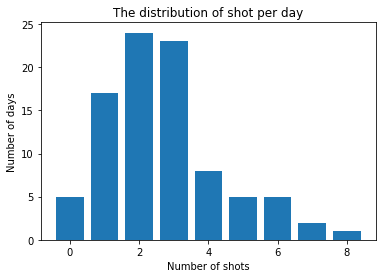

In [48]:
df_2022 = df[df['year']>2021]
df_2022 = df_2022[df_2022['month'] < 4]
date_distribution = df_2022.groupby('date')[['date_count']].agg(lambda x: len(x)).value_counts().sort_index()

# the total number of dates in 2022
total_number_date = 31 + 28 + 31
date_distribution_2022 = [total_number_date - sum(date_distribution)]
for element in date_distribution:
    date_distribution_2022.append(element)
print(date_distribution_2022)
plt.bar(x = [0,1,2,3,4,5,6,7,8], height = date_distribution_2022)
plt.title('The distribution of shot per day')
plt.ylabel('Number of days')
plt.xlabel('Number of shots')

In [49]:
df_2022

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,year,year_count,dt_time,date_count,month,weekday
6991,7462,Michael Dobbins,2022-01-01,shot,gun,63.0,M,NaN,Jonesboro,LA,...,False,NaN,NaN,True,2022,7462,2022-01-01,7462,1,6
6992,7661,James Williams,2022-01-01,shot,gun,46.0,M,B,Canton,OH,...,True,-81.405,40.793,True,2022,7661,2022-01-01,7661,1,6
6993,7461,NaN,2022-01-02,shot,gun,NaN,M,NaN,Wildomar,CA,...,False,NaN,NaN,True,2022,7461,2022-01-02,7461,1,7
6994,7453,Charles Corey Castro,2022-01-03,shot,unknown weapon,54.0,M,NaN,Murphy,ID,...,False,NaN,NaN,True,2022,7453,2022-01-03,7453,1,1
6995,7458,Caleb Stanford,2022-01-03,shot,knife,26.0,M,NaN,Mesa,AZ,...,False,NaN,NaN,True,2022,7458,2022-01-03,7458,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7229,7886,Samantha L. Edgmond,2022-03-30,shot,metal pipe,35.0,F,NaN,Atkins,AR,...,False,-92.964,35.243,True,2022,7886,2022-03-30,7886,3,3
7230,7885,Hector Miguel Portuondo,2022-03-31,shot,gun,53.0,M,NaN,Miami-Dade County,FL,...,False,-80.231,25.890,True,2022,7885,2022-03-31,7885,3,4
7231,7887,Erik Poul Moller Nielsen,2022-03-31,shot,undetermined,36.0,M,NaN,Columbia Township,MI,...,False,-84.290,42.100,True,2022,7887,2022-03-31,7887,3,4
7232,7899,Michael Norton Stockton,2022-03-31,shot,gun,39.0,M,NaN,Scappoose,OR,...,False,-122.880,45.768,True,2022,7899,2022-03-31,7899,3,4


Need to combine the last two entries

[5, 17, 24, 23, 8, 5, 5, 3]


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

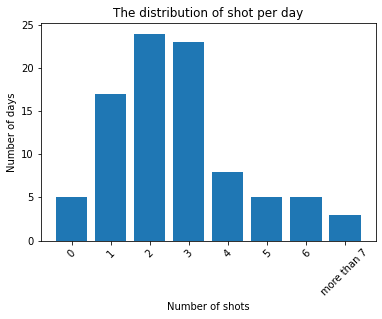

In [50]:
tail = date_distribution_2022[7] + date_distribution_2022[8]
date_distribution_2022_modified = date_distribution_2022[0:7]
date_distribution_2022_modified.append(tail)
print(date_distribution_2022_modified)
plt.bar(x = ['0','1','2','3','4','5','6','more than 7'], height = date_distribution_2022_modified)
plt.title('The distribution of shot per day')
plt.ylabel('Number of days')
plt.xlabel('Number of shots')
plt.xticks(rotation = 45)

In [51]:
total_shot_2022 = sum(date_distribution)
total_shot_2022

85

If we assume Poisson distribution
$$
    k = \frac{243}{90} = 2.7
$$
And thus the Poisson distribution should have a density function
$$
    f_{X}(x) = \frac{2.7^{x}e^{-2.7}}{x!}
$$

<BarContainer object of 8 artists>

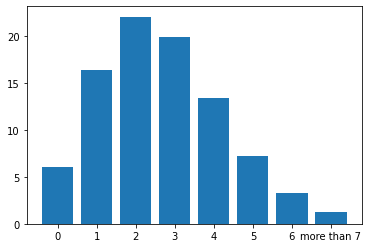

In [52]:
def density_function_2022(x):
    return (2.7**x)* math.exp(-2.7) / math.factorial(x)

predicted_2022 = []
for i in range (0,8):
    predicted_2022.append(density_function_2022(i) * 90)

plt.bar(x = ['0','1','2','3','4','5','6','more than 7'] ,height = predicted_2022)

In [53]:
calculate_chi_square(date_distribution_2022_modified, predicted_2022)

7.106493312895138

We find that
$$
    \chi_{0.05, 6} = 12.59 > 7.106
$$
So we cannot reject $H_{0}$. Actually the P value is
$$
    P = 0.31
$$